**Delhi House Price Prediction**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mgn


In [ ]:
delhi_house_price = pd.read_csv('../content/Delhi_v2.csv')
delhi_house_price.head(2)

,Unnamed: 0,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,Landmarks,type_of_building,desc,Price_sqft
0,0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,28.608850,77.460560,3.0,3.0,NaN,Under Construction,New Property,NaN,NaN,2.0,NaN,Flat,\n\n\n Welcome ...,4148.148148
1,1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,28.374236,76.952416,3.0,3.0,NaN,Ready to Move,New Property,NaN,Semi-Furnished,2.0,NaN,Flat,\n\n\n Mapsko M...,5906.040268


In [ ]:
delhi_house_price.shape

(7738, 18)

In [ ]:
delhi_house_price.columns

Index(['Unnamed: 0', 'price', 'Address', 'area', 'latitude', 'longitude',
       'Bedrooms', 'Bathrooms', 'Balcony', 'Status', 'neworold', 'parking',
       'Furnished_status', 'Lift', 'Landmarks', 'type_of_building', 'desc',
       'Price_sqft'],
      dtype='object')

In [ ]:
delhi_house_price.dtypes

Unnamed: 0            int64
price               float64
Address              object
area                float64
latitude            float64
longitude           float64
Bedrooms            float64
Bathrooms           float64
Balcony             float64
Status               object
neworold             object
parking             float64
Furnished_status     object
Lift                float64
Landmarks            object
type_of_building     object
desc                 object
Price_sqft          float64
dtype: object

In [ ]:
delhi_house_price.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7738 entries, 0 to 7737
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7738 non-null   int64  
 1   price             7738 non-null   float64
 2   Address           7738 non-null   object 
 3   area              7738 non-null   float64
 4   latitude          7738 non-null   float64
 5   longitude         7738 non-null   float64
 6   Bedrooms          7738 non-null   float64
 7   Bathrooms         7738 non-null   float64
 8   Balcony           5166 non-null   float64
 9   Status            7164 non-null   object 
 10  neworold          7738 non-null   object 
 11  parking           2612 non-null   float64
 12  Furnished_status  4124 non-null   object 
 13  Lift              1733 non-null   float64
 14  Landmarks         2759 non-null   object 
 15  type_of_building  7738 non-null   object 
 16  desc              7738 non-null   object 


In [ ]:
delhi_house_price.describe().round(2)

,Unnamed: 0,price,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,parking,Lift,Price_sqft
count,7738.00,7738.00,7738.00,7738.00,7738.00,7738.00,7738.00,5166.00,2612.00,1733.00,7738.00
mean,3868.50,8320634.53,1409.51,28.55,77.27,2.71,2.50,2.43,7.67,1.83,5543.66
std,2233.91,7223197.50,718.93,0.11,0.18,0.88,0.87,1.08,60.42,1.19,2408.66
min,0.00,1700000.00,501.00,28.24,76.88,2.00,2.00,1.00,1.00,0.00,2100.00
25%,1934.25,4200000.00,990.00,28.46,77.08,2.00,2.00,2.00,1.00,1.00,3950.99
50%,3868.50,6000000.00,1250.00,28.57,77.35,3.00,2.00,2.00,1.00,2.00,4972.67
75%,5802.75,9500000.00,1650.00,28.64,77.42,3.00,3.00,3.00,2.00,2.00,6350.64
max,7737.00,85000000.00,9500.00,28.80,77.69,10.00,10.00,10.00,1406.00,10.00,44378.70


In [ ]:
delhi_house_price.describe(exclude=[np.number])

,Address,Status,neworold,Furnished_status,Landmarks,type_of_building,desc
count,7738,7164,7738,4124,2759,7738,7738
unique,4145,2,2,3,2612,2,4181
top,"Raj Nagar Extension, Ghaziabad, Delhi NCR",Ready to Move,Resale,Semi-Furnished,metro station,Flat,\n
freq,163,7148,6905,2199,8,6226,3257


In [ ]:
delhi_house_price.isna().sum()/len(delhi_house_price)*100

Unnamed: 0           0.000000
price                0.000000
Address              0.000000
area                 0.000000
latitude             0.000000
longitude            0.000000
Bedrooms             0.000000
Bathrooms            0.000000
Balcony             33.238563
Status               7.417937
neworold             0.000000
parking             66.244508
Furnished_status    46.704575
Lift                77.604032
Landmarks           64.344792
type_of_building     0.000000
desc                 0.000000
Price_sqft           0.000000
dtype: float64

<Axes: >

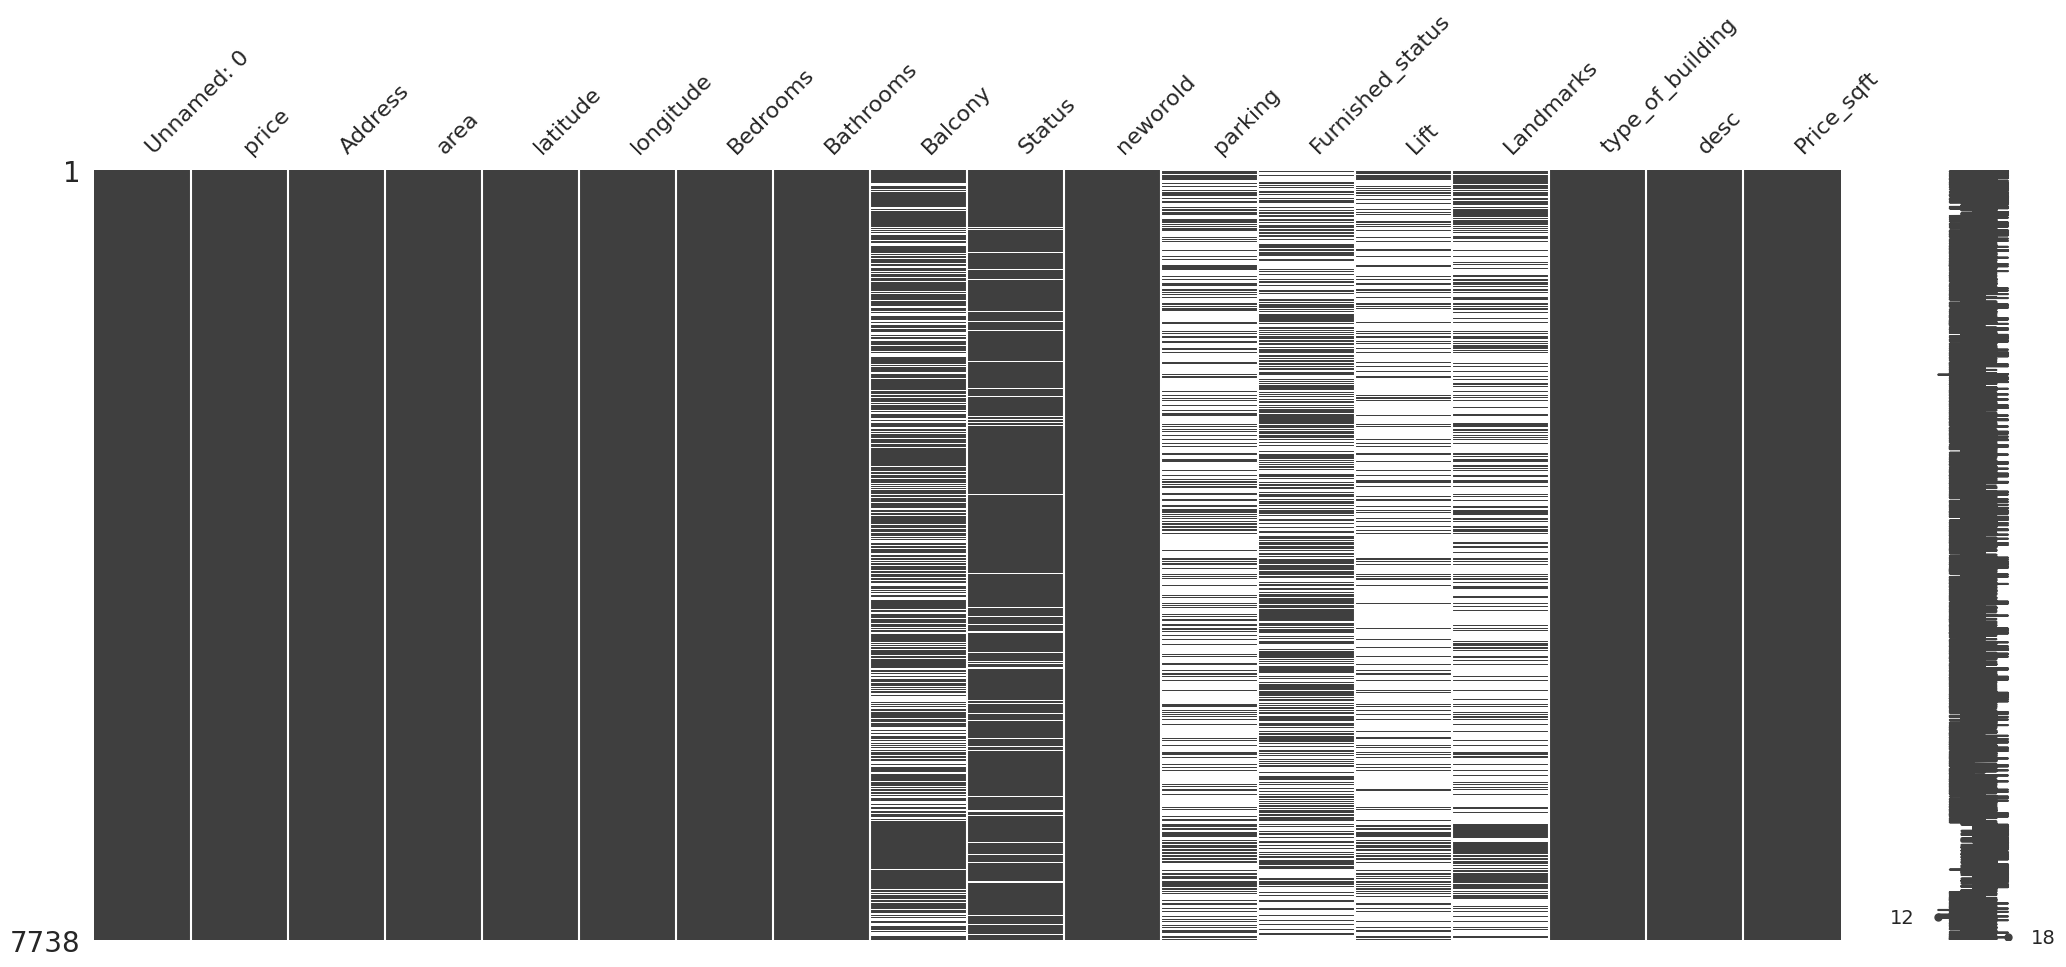

In [ ]:
mgn.matrix(delhi_house_price)

<Axes: >

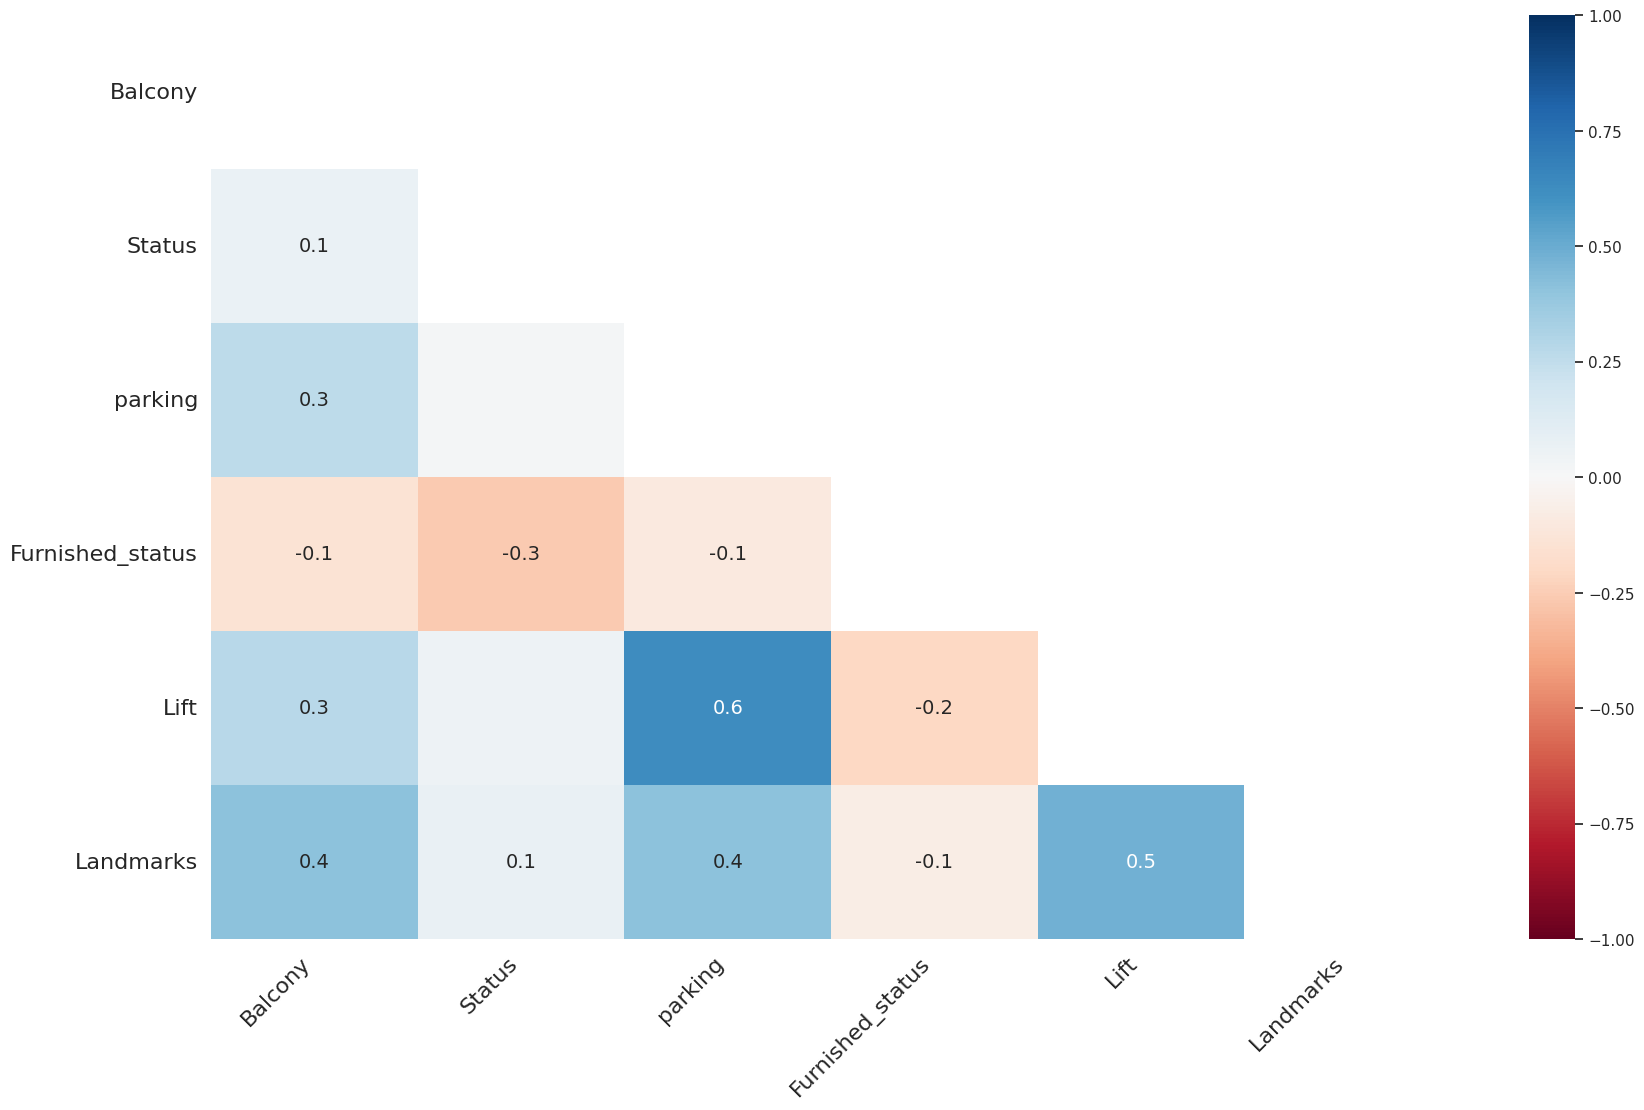

In [ ]:
mgn.heatmap(delhi_house_price)

<Axes: >

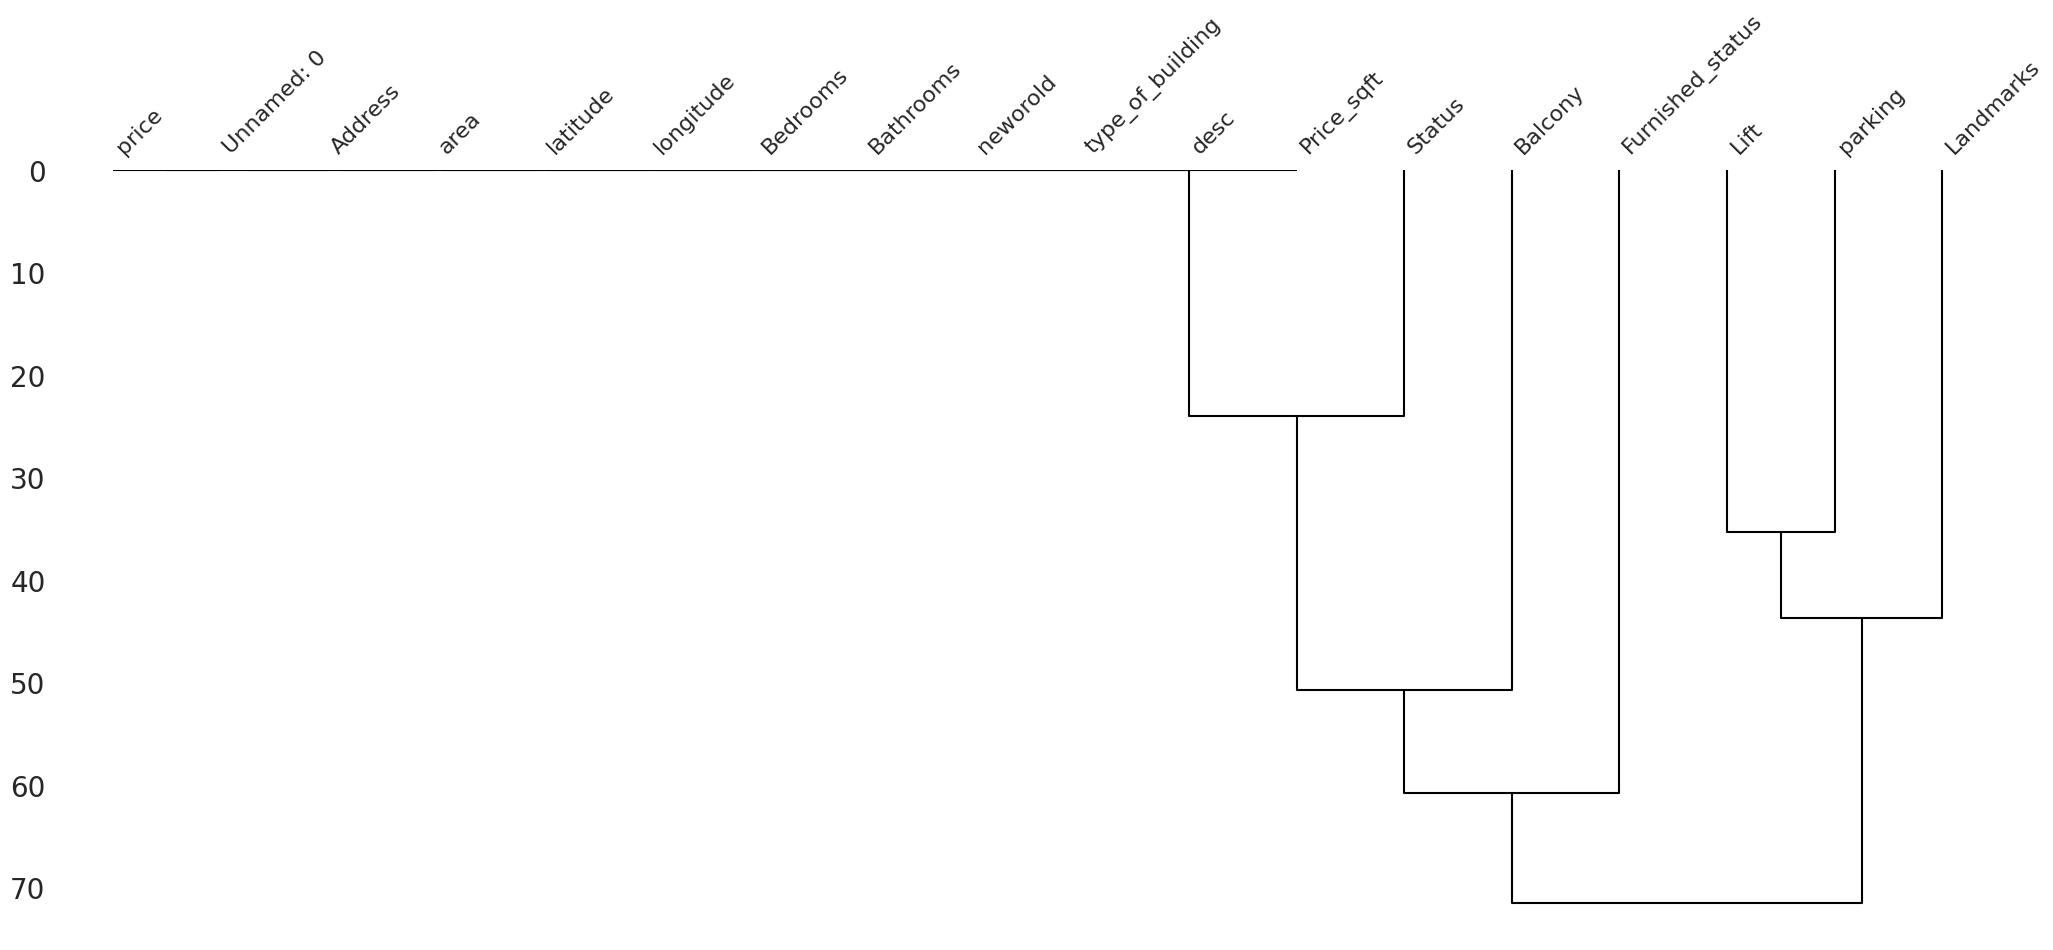

In [ ]:
mgn.dendrogram(delhi_house_price)

In [ ]:
delhi_house_price[delhi_house_price.duplicated()]

,Unnamed: 0,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,Landmarks,type_of_building,desc,Price_sqft


In [ ]:
cols = ['Bedrooms',	'Bathrooms',	'Balcony',	'parking',	'Lift', 'Address',	'Status',	'neworold',	'Furnished_status',	'Landmarks',	'type_of_building',	'desc']

for col in cols:
  print(delhi_house_price[col].value_counts(dropna=False))

2.0     3525
3.0     3373
4.0      642
5.0       98
6.0       46
7.0       17
9.0       16
10.0      11
8.0       10
Name: Bedrooms, dtype: int64
2.0     5051
3.0     1907
4.0      551
5.0      138
6.0       44
7.0       21
8.0       12
9.0       10
10.0       4
Name: Bathrooms, dtype: int64
NaN     2572
2.0     1793
3.0     1516
1.0     1082
4.0      613
5.0      130
6.0       21
7.0        4
10.0       3
8.0        3
9.0        1
Name: Balcony, dtype: int64
NaN      5126
1.0      1715
2.0       640
3.0       110
4.0        45
         ... 
18.0        1
602.0       1
16.0        1
624.0       1
179.0       1
Name: parking, Length: 66, dtype: int64
NaN     6005
2.0      800
1.0      296
0.0      269
3.0      258
4.0       86
6.0        8
5.0        7
7.0        4
10.0       2
8.0        2
9.0        1
Name: Lift, dtype: int64
Raj Nagar Extension, Ghaziabad, Delhi NCR                                     163
Indirapuram, Ghaziabad, Delhi NCR                                             1

In [ ]:
numerical_columns = ['price',	'area',	'latitude',	'longitude',	'Bedrooms',	'Bathrooms',	'Balcony',	'parking',	'Lift',	'Price_sqft']

delhi_house_price[numerical_columns].corr()

,price,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,parking,Lift,Price_sqft
price,1.000000,0.849073,-0.227517,-0.331883,0.606914,0.691990,0.255096,-0.041640,0.037892,0.682768
area,0.849073,1.000000,-0.279069,-0.184427,0.683479,0.763650,0.420476,-0.036780,0.128409,0.292711
latitude,-0.227517,-0.279069,1.000000,0.401701,-0.140817,-0.246663,-0.199374,-0.053874,-0.094808,-0.098981
longitude,-0.331883,-0.184427,0.401701,1.000000,-0.166826,-0.205187,0.090932,0.019576,0.139778,-0.451146
Bedrooms,0.606914,0.683479,-0.140817,-0.166826,1.000000,0.765479,0.283880,-0.037920,-0.048828,0.348992
Bathrooms,0.691990,0.763650,-0.246663,-0.205187,0.765479,1.000000,0.361291,-0.043036,0.068791,0.356413
Balcony,0.255096,0.420476,-0.199374,0.090932,0.283880,0.361291,1.000000,0.000870,0.331883,-0.012863
parking,-0.041640,-0.036780,-0.053874,0.019576,-0.037920,-0.043036,0.000870,1.000000,0.037927,-0.045357
Lift,0.037892,0.128409,-0.094808,0.139778,-0.048828,0.068791,0.331883,0.037927,1.000000,-0.133483
Price_sqft,0.682768,0.292711,-0.098981,-0.451146,0.348992,0.356413,-0.012863,-0.045357,-0.133483,1.000000


**Here we can see that 'Lift' and 'parking' are least correlated with Price.**

In [ ]:
dhp = delhi_house_price.copy()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Introduce IterativeImputer with an estimator
imp = IterativeImputer(estimator=RandomForestRegressor())
# Fit to the dataset containing missing values
imp.fit(delhi_house_price[numerical_columns])
# Transform the dataset containing missing values
dhp[numerical_columns] = pd.DataFrame(imp.transform(delhi_house_price[numerical_columns]), columns = numerical_columns)
dhp[numerical_columns]

,price,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,parking,Lift,Price_sqft
0,5600000.0,1350.0,28.608850,77.460560,3.0,3.0,2.845,5.13,2.00,4148.148148
1,8800000.0,1490.0,28.374236,76.952416,3.0,3.0,2.340,32.83,2.00,5906.040268
2,16500000.0,2385.0,28.645769,77.385110,4.0,5.0,3.140,1.00,2.59,6918.238994
3,3810000.0,1050.0,28.566914,77.436434,2.0,2.0,3.000,1.00,2.00,3628.571429
4,6200000.0,1350.0,28.520732,77.356491,2.0,2.0,3.000,1.00,3.00,4592.592593
...,...,...,...,...,...,...,...,...,...,...
7733,7900000.0,1095.0,28.635272,77.370395,2.0,2.0,2.330,1.09,4.54,7214.611872
7734,4510000.0,1060.0,28.581431,77.452819,2.0,2.0,3.000,1.01,2.20,4254.716981
7735,7000000.0,1898.0,28.625850,77.435336,4.0,3.0,5.000,1.79,2.15,3688.092729
7736,6500000.0,1400.0,28.701622,77.430153,3.0,3.0,2.000,1.00,3.00,4642.857143


In [ ]:
numerical_columns = ['price',	'area',	'latitude',	'longitude',	'Bedrooms',	'Bathrooms',	'Balcony',	'parking',	'Lift',	'Price_sqft']

dhp[numerical_columns].corr()

,price,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,parking,Lift,Price_sqft
price,1.000000,0.849073,-0.227517,-0.331883,0.606914,0.691990,0.289795,-0.053071,0.090122,0.682768
area,0.849073,1.000000,-0.279069,-0.184427,0.683479,0.763650,0.464927,-0.036740,0.244467,0.292711
latitude,-0.227517,-0.279069,1.000000,0.401701,-0.140817,-0.246663,-0.216285,-0.094072,-0.215788,-0.098981
longitude,-0.331883,-0.184427,0.401701,1.000000,-0.166826,-0.205187,0.093986,0.034159,0.194253,-0.451146
Bedrooms,0.606914,0.683479,-0.140817,-0.166826,1.000000,0.765479,0.322075,-0.046153,0.057278,0.348992
Bathrooms,0.691990,0.763650,-0.246663,-0.205187,0.765479,1.000000,0.395013,-0.045365,0.148054,0.356413
Balcony,0.289795,0.464927,-0.216285,0.093986,0.322075,0.395013,1.000000,0.024024,0.511452,-0.004391
parking,-0.053071,-0.036740,-0.094072,0.034159,-0.046153,-0.045365,0.024024,1.000000,0.076820,-0.064670
Lift,0.090122,0.244467,-0.215788,0.194253,0.057278,0.148054,0.511452,0.076820,1.000000,-0.178866
Price_sqft,0.682768,0.292711,-0.098981,-0.451146,0.348992,0.356413,-0.004391,-0.064670,-0.178866,1.000000


**We can see after imputing also, 'parking' and	'Lift' columns are least correlated with Price. Hence we will drop them**

In [ ]:
dhp.drop(columns=['Unnamed: 0','parking','Lift','Landmarks','desc'], axis=1,inplace=True)

In [ ]:
dhp.head()

,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,Furnished_status,type_of_building,Price_sqft
0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,28.608850,77.460560,3.0,3.0,2.845,Under Construction,New Property,NaN,Flat,4148.148148
1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,28.374236,76.952416,3.0,3.0,2.340,Ready to Move,New Property,Semi-Furnished,Flat,5906.040268
2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,28.645769,77.385110,4.0,5.0,3.140,Ready to Move,New Property,Unfurnished,Flat,6918.238994
3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,28.566914,77.436434,2.0,2.0,3.000,NaN,New Property,Unfurnished,Flat,3628.571429
4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,28.520732,77.356491,2.0,2.0,3.000,Ready to Move,Resale,NaN,Flat,4592.592593


<Axes: >

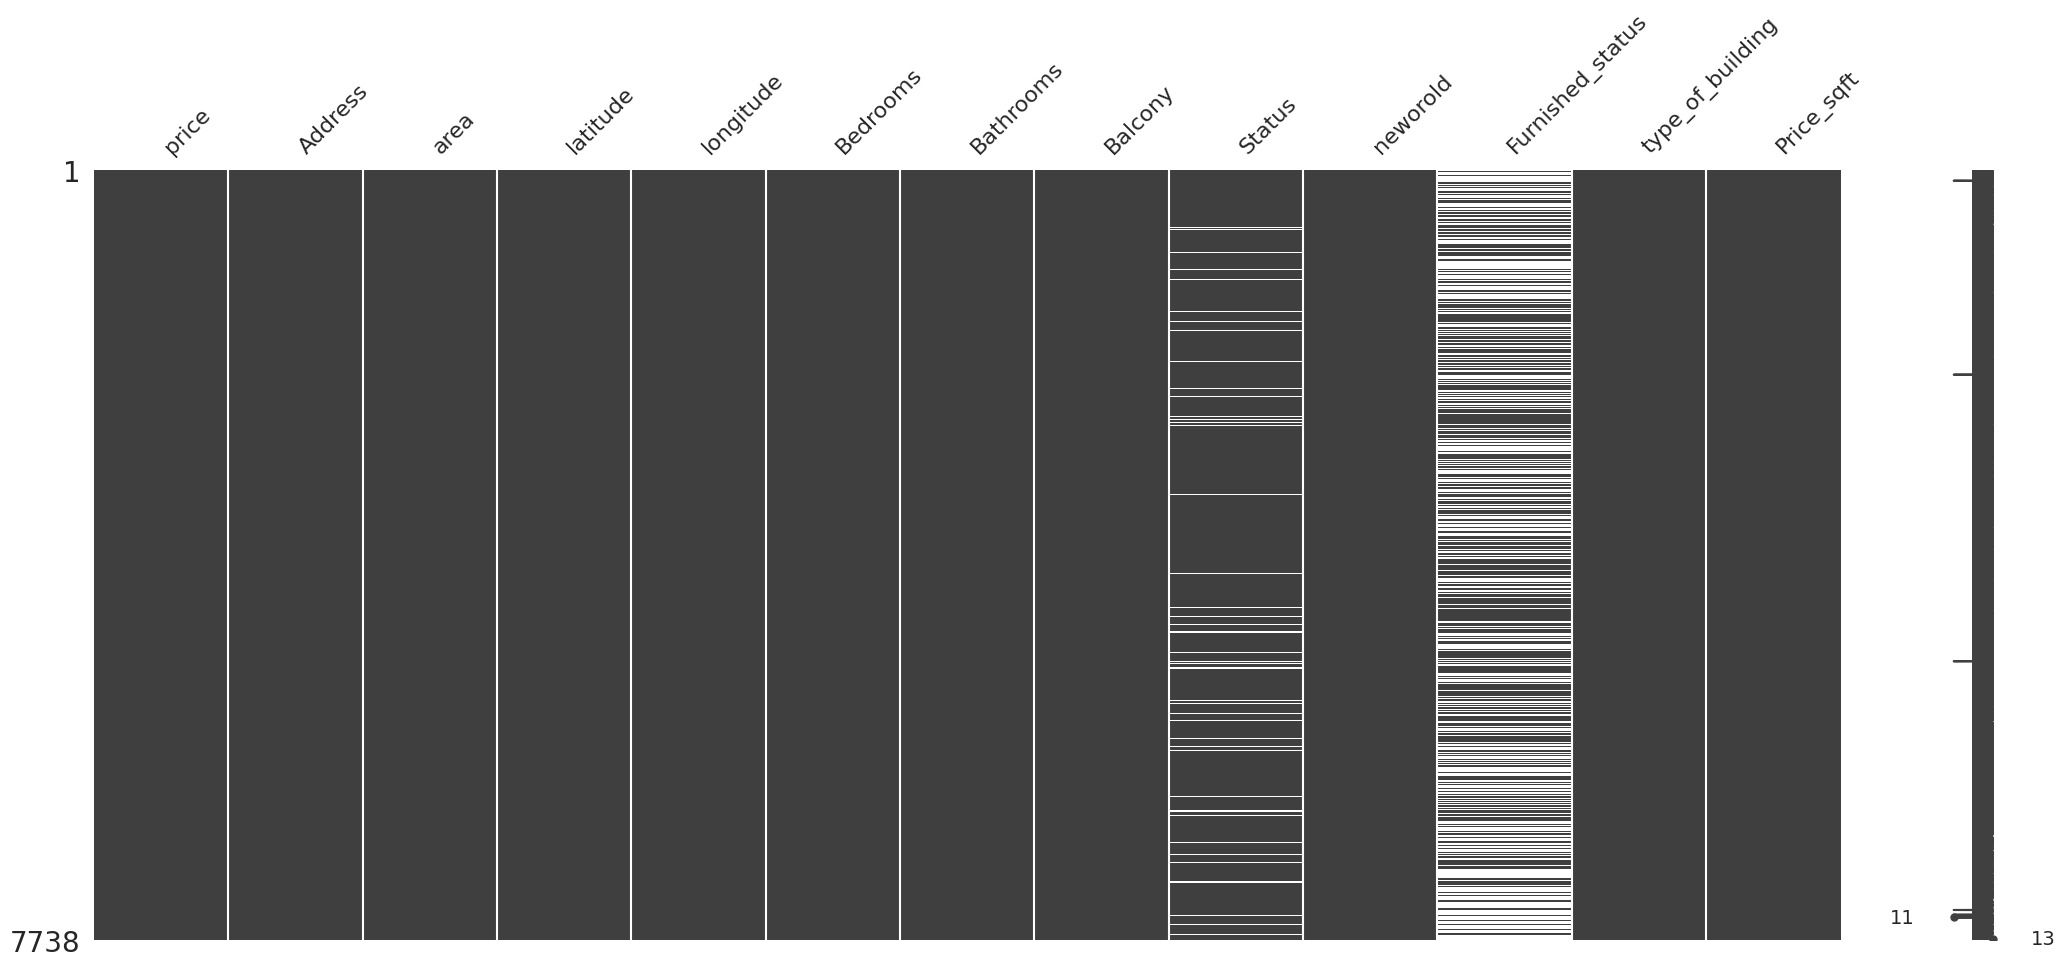

In [ ]:
mgn.matrix(dhp)

In [ ]:
from sklearn.impute import SimpleImputer

cat_cols = ['Status',	'Furnished_status']

si = SimpleImputer(strategy='most_frequent')
si.fit(delhi_house_price[cat_cols])

dhp[cat_cols] = pd.DataFrame(si.transform(delhi_house_price[cat_cols]), columns=cat_cols)
dhp[cat_cols]

,Status,Furnished_status
0,Under Construction,Semi-Furnished
1,Ready to Move,Semi-Furnished
2,Ready to Move,Unfurnished
3,Ready to Move,Unfurnished
4,Ready to Move,Semi-Furnished
...,...,...
7733,Ready to Move,Semi-Furnished
7734,Ready to Move,Semi-Furnished
7735,Ready to Move,Semi-Furnished
7736,Ready to Move,Semi-Furnished


In [ ]:
dhp.isna().sum()

price               0
Address             0
area                0
latitude            0
longitude           0
Bedrooms            0
Bathrooms           0
Balcony             0
Status              0
neworold            0
Furnished_status    0
type_of_building    0
Price_sqft          0
dtype: int64

In [ ]:
dhp.Address.value_counts()

Raj Nagar Extension, Ghaziabad, Delhi NCR                                     163
Indirapuram, Ghaziabad, Delhi NCR                                             152
Greater Noida West, Greater Noida, Delhi NCR                                  100
Noida Extension, Noida, Delhi NCR                                              63
NH 24, Ghaziabad, Delhi NCR                                                    61
                                                                             ... 
e block sector 57, Sector 57, Gurgaon, Delhi NCR                                1
Ramakrishna apartment, Indraprastha Extension, New Delhi - East, Delhi NCR      1
Rajnagar Extension Gahziabad, Raj Nagar Extension, Ghaziabad, Delhi NCR         1
Rajendra Park, Rajendra Park, Gurgaon, Delhi NCR                                1
sandal apartment, Shalimar Garden Extension 1, Ghaziabad, Delhi NCR             1
Name: Address, Length: 4145, dtype: int64

In [ ]:
address = dhp.Address.str.rsplit(pat=',', n=2, expand=True).rename(columns={0:'locality',1:'City',2:'State'}).copy()

address['City'] = np.where(address['State'].isna(), address.locality.str.strip(), address.City.str.strip())

dhp.drop(columns=['Address'],axis=1,inplace=True)

dhp['City'] = address['City']

dhp.head()


,price,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,Furnished_status,type_of_building,Price_sqft,City
0,5600000.0,1350.0,28.608850,77.460560,3.0,3.0,2.845,Under Construction,New Property,Semi-Furnished,Flat,4148.148148,Noida
1,8800000.0,1490.0,28.374236,76.952416,3.0,3.0,2.340,Ready to Move,New Property,Semi-Furnished,Flat,5906.040268,Gurgaon
2,16500000.0,2385.0,28.645769,77.385110,4.0,5.0,3.140,Ready to Move,New Property,Unfurnished,Flat,6918.238994,Ghaziabad
3,3810000.0,1050.0,28.566914,77.436434,2.0,2.0,3.000,Ready to Move,New Property,Unfurnished,Flat,3628.571429,Greater Noida
4,6200000.0,1350.0,28.520732,77.356491,2.0,2.0,3.000,Ready to Move,Resale,Semi-Furnished,Flat,4592.592593,Noida


In [ ]:
dhp.isna().sum()

price               0
area                0
latitude            0
longitude           0
Bedrooms            0
Bathrooms           0
Balcony             0
Status              0
neworold            0
Furnished_status    0
type_of_building    0
Price_sqft          0
City                0
dtype: int64

<Figure size 800x500 with 0 Axes>

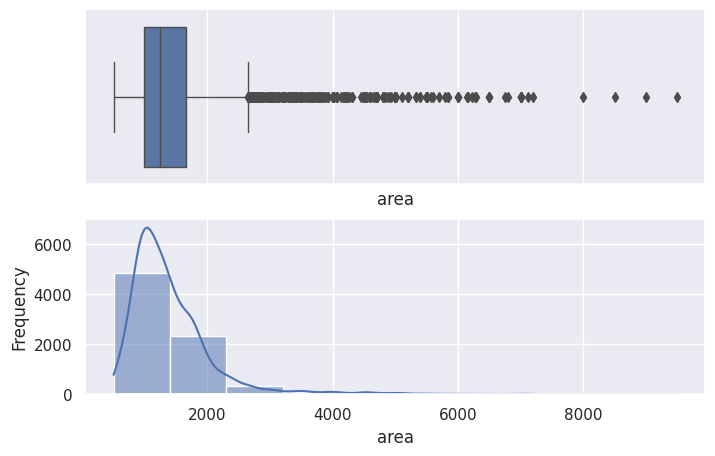

<Figure size 800x500 with 0 Axes>

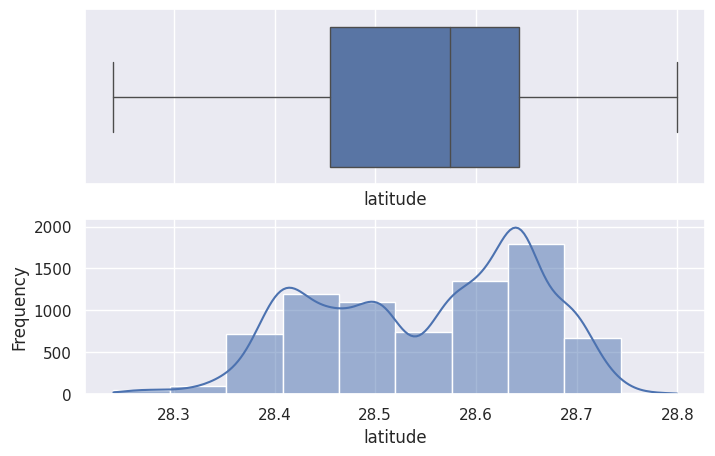

<Figure size 800x500 with 0 Axes>

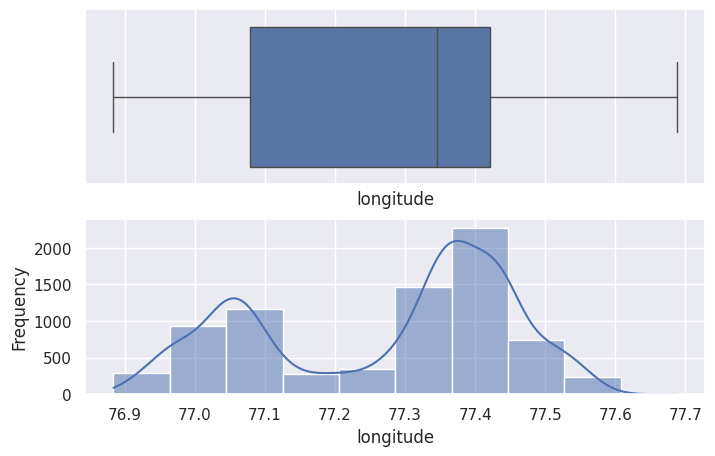

<Figure size 800x500 with 0 Axes>

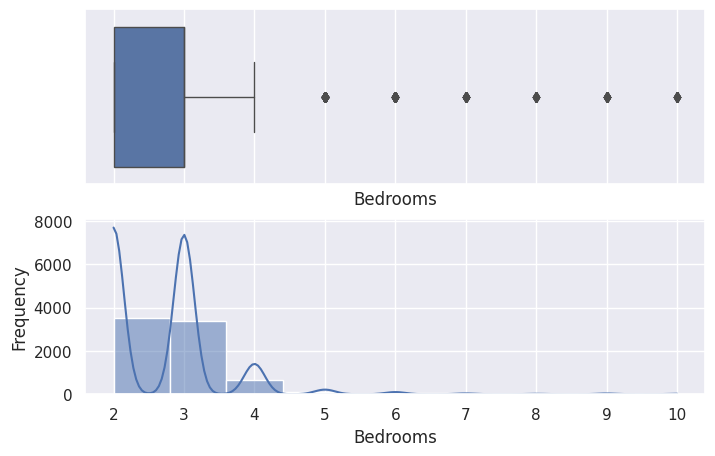

<Figure size 800x500 with 0 Axes>

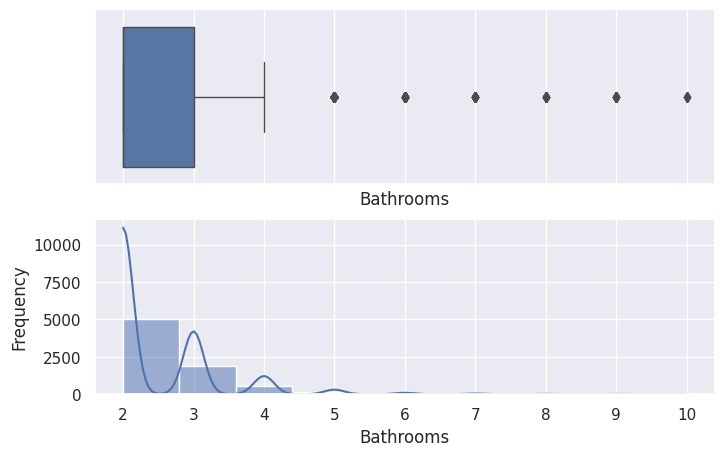

<Figure size 800x500 with 0 Axes>

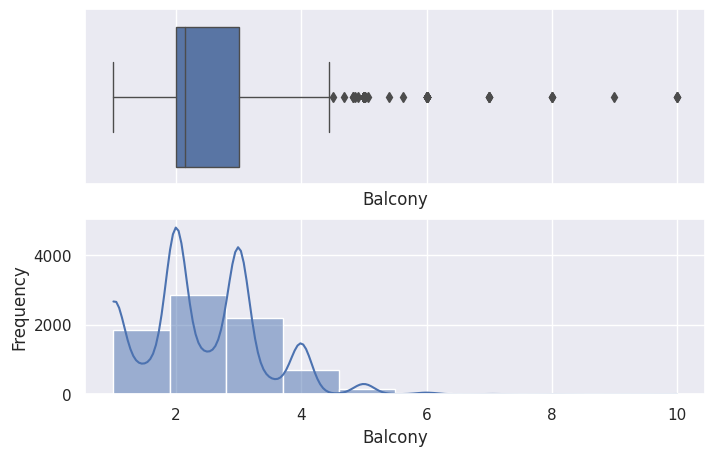

<Figure size 800x500 with 0 Axes>

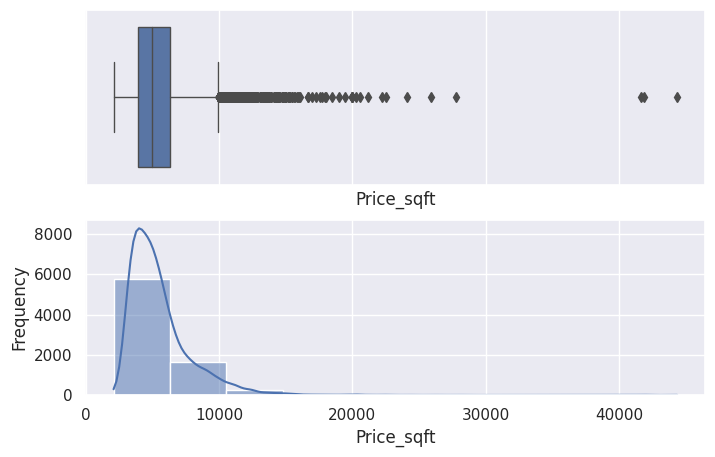

In [ ]:
# Univariate Analysis

# Checking for outleirs

numerical_columns = ['area',	'latitude',	'longitude',	'Bedrooms',	'Bathrooms', 'Balcony', 'Price_sqft']

for i in numerical_columns:
  plt.figure()
  plt.tight_layout()
  sns.set(rc={"figure.figsize":(8, 5)})
  f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
  plt.gca().set(xlabel= i,ylabel='Frequency')
  sns.boxplot(x=dhp[i], ax=ax_box , linewidth= 1.0)
  sns.histplot(x=dhp[i], ax=ax_hist , bins = 10,kde=True)

In [ ]:
!pip install category_encoders

In [ ]:
from category_encoders.binary import BinaryEncoder
cat_columns = ['Status','neworold','Furnished_status','type_of_building']
be = BinaryEncoder(cols=['City'], drop_invariant=True)
dhp_cat = pd.concat([be.fit_transform(dhp['City']),pd.get_dummies(dhp[cat_columns],drop_first=True)],axis=1,join='inner')
dhp_cat


,City_0,City_1,City_2,City_3,Status_Under Construction,neworold_Resale,Furnished_status_Semi-Furnished,Furnished_status_Unfurnished,type_of_building_Individual House
0,0,0,0,1,1,0,1,0,0
1,0,0,1,0,0,0,1,0,0
2,0,0,1,1,0,0,0,1,0
3,0,1,0,0,0,0,0,1,0
4,0,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...
7733,0,0,1,1,0,1,1,0,0
7734,0,1,0,0,0,1,1,0,0
7735,0,0,1,1,0,1,1,0,0
7736,0,0,1,1,0,1,1,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
dhp_num = pd.DataFrame(sc.fit_transform(dhp[numerical_columns]), columns=numerical_columns)
dhp_num

,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Price_sqft
0,-0.082776,0.528406,1.035934,0.332745,0.575364,0.440690,-0.579410
1,0.111970,-1.655820,-1.777792,0.332745,0.575364,-0.071730,0.150459
2,1.356957,0.872116,0.618147,1.473036,2.882185,0.740024,0.570719
3,-0.500090,0.137988,0.902342,-0.807547,-0.578047,0.597967,-0.795136
4,-0.082776,-0.291960,0.459676,-0.807547,-0.578047,0.597967,-0.394879
...,...,...,...,...,...,...,...
7733,-0.437493,0.774390,0.536664,-0.807547,-0.578047,-0.081877,0.693772
7734,-0.486180,0.273140,0.993071,-0.807547,-0.578047,0.597967,-0.535164
7735,0.679517,0.686673,0.896262,1.473036,0.575364,2.627352,-0.770423
7736,-0.013224,1.392100,0.867562,0.332745,0.575364,-0.416725,-0.374009


In [ ]:
dhp_cat_num = pd.concat([dhp_cat,dhp_num],axis=1,join='inner')
dhp_cat_num

,City_0,City_1,City_2,City_3,Status_Under Construction,neworold_Resale,Furnished_status_Semi-Furnished,Furnished_status_Unfurnished,type_of_building_Individual House,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Price_sqft
0,0,0,0,1,1,0,1,0,0,-0.082776,0.528406,1.035934,0.332745,0.575364,0.440690,-0.579410
1,0,0,1,0,0,0,1,0,0,0.111970,-1.655820,-1.777792,0.332745,0.575364,-0.071730,0.150459
2,0,0,1,1,0,0,0,1,0,1.356957,0.872116,0.618147,1.473036,2.882185,0.740024,0.570719
3,0,1,0,0,0,0,0,1,0,-0.500090,0.137988,0.902342,-0.807547,-0.578047,0.597967,-0.795136
4,0,0,0,1,0,1,1,0,0,-0.082776,-0.291960,0.459676,-0.807547,-0.578047,0.597967,-0.394879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7733,0,0,1,1,0,1,1,0,0,-0.437493,0.774390,0.536664,-0.807547,-0.578047,-0.081877,0.693772
7734,0,1,0,0,0,1,1,0,0,-0.486180,0.273140,0.993071,-0.807547,-0.578047,0.597967,-0.535164
7735,0,0,1,1,0,1,1,0,0,0.679517,0.686673,0.896262,1.473036,0.575364,2.627352,-0.770423
7736,0,0,1,1,0,1,1,0,0,-0.013224,1.392100,0.867562,0.332745,0.575364,-0.416725,-0.374009


In [ ]:
y = dhp['price']
y

0        5600000.0
1        8800000.0
2       16500000.0
3        3810000.0
4        6200000.0
           ...    
7733     7900000.0
7734     4510000.0
7735     7000000.0
7736     6500000.0
7737     6500000.0
Name: price, Length: 7738, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dhp_cat_num,y, test_size=0.25)


Lets train the following models:

1. Linear Regression
2. DecisionTreeRegressor
3. RandomForestRegressor
4. GradientBoostingRegressor
5. SupportVectorRegression
6. KNeighborRegressor

**LinearRegression**

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train,y_train)

lr_y_train_pred = lr.predict(X_train)
lr_y_test_pred = lr.predict(X_test)

In [ ]:
# Training data performance
from math import sqrt
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
n_X_train = len(X_train)
k_X_train = X_train.shape[1]
print((n,k))


print(f'Mean Absolute Error\n: {mean_absolute_error(y_train, lr_y_train_pred)}')
print(f'Mean Squared Error\n: {mean_squared_error(y_train, lr_y_train_pred)}')
print(f'Root Mean Squared Error\n: {sqrt(mean_squared_error(y_train, lr_y_train_pred))}')
#print(f'Mean Squared Log Error\n: {mean_squared_log_error(y_train, lr_y_train_pred)}')
print(f'R2 Score\n: {r2_score(y_train, lr_y_train_pred)}')
print(f'Adjusted R2 Error\n: {1-((1-r2_score(y_train, lr_y_train_pred))*(n_X_train-1)/(n_X_train-k_X_train-1))}')

(1935, 16)
Mean Absolute Error
: 1028905.5447461146
Mean Squared Error
: 3594935126813.3306
Root Mean Squared Error
: 1896031.4150386145
R2 Score
: 0.9332128905889309
Adjusted R2 Error
: 0.9330282044930828


In [ ]:
n_X_test = len(X_test)
k_X_test = X_test.shape[1]
print((n,k))


print(f'Mean Absolute Error\n: {mean_absolute_error(y_test, lr_y_test_pred)}')
print(f'Mean Squared Error\n: {mean_squared_error(y_test, lr_y_test_pred)}')
print(f'Root Mean Squared Error\n: {sqrt(mean_squared_error(y_test, lr_y_test_pred))}')
#print(f'Mean Squared Log Error\n: {mean_squared_log_error(y_test, lr_y_test_pred)}')
print(f'R2 Score\n: {r2_score(y_test, lr_y_test_pred)}')
print(f'Adjusted R2 Error\n: {1-((1-r2_score(y_test, lr_y_test_pred))*(n_X_test-1)/(n_X_test-k_X_test-1))}')

(1935, 16)
Mean Absolute Error
: 962291.2840305272
Mean Squared Error
: 3042303549351.9297
Root Mean Squared Error
: 1744220.040405433
R2 Score
: 0.9355335264920467
Adjusted R2 Error
: 0.9349957456911462


**DecisionTreeRegressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


params = {
  'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
  'splitter': ['best', 'random'],
  'max_features': ['sqrt', 'log2']
}

dt_gscv = GridSearchCV(DecisionTreeRegressor(),param_grid=params,cv=5)

dt_gscv.fit(X_train,y_train)

dt_gscv.best_params_

{'criterion': 'squared_error', 'max_features': 'log2', 'splitter': 'best'}

In [ ]:
dc = DecisionTreeRegressor(criterion='squared_error', max_features='log2', splitter='best')

dc.fit(X_train,y_train)

dc_y_train_pred = dc.predict(X_train)
dc_y_test_pred = dc.predict(X_test)

In [ ]:
print(f'Mean Absolute Error\n: {mean_absolute_error(y_train, dc_y_train_pred)}')
print(f'Mean Squared Error\n: {mean_squared_error(y_train, dc_y_train_pred)}')
print(f'Root Mean Squared Error\n: {sqrt(mean_squared_error(y_train, dc_y_train_pred))}')
#print(f'Mean Squared Log Error\n: {mean_squared_log_error(y_train, dc_y_train_pred)}')
print(f'R2 Score\n: {r2_score(y_train, dc_y_train_pred)}')
print(f'Adjusted R2 Error\n: {1-((1-r2_score(y_train, dc_y_train_pred))*(n_X_train-1)/(n_X_train-k_X_train-1))}')

Mean Absolute Error
: 506.6344993968637
Mean Squared Error
: 201171807.68567982
Root Mean Squared Error
: 14183.504774408892
R2 Score
: 0.9999962626075141
Adjusted R2 Error
: 0.9999962522725193


In [ ]:
print(f'Mean Absolute Error\n: {mean_absolute_error(y_test, dc_y_test_pred)}')
print(f'Mean Squared Error\n: {mean_squared_error(y_test, dc_y_test_pred)}')
print(f'Root Mean Squared Error\n: {sqrt(mean_squared_error(y_test, dc_y_test_pred))}')
#print(f'Mean Squared Log Error\n: {mean_squared_log_error(y_test, dc_y_test_pred)}')
print(f'R2 Score\n: {r2_score(y_test, dc_y_test_pred)}')
print(f'Adjusted R2 Error\n: {1-((1-r2_score(y_test, dc_y_test_pred))*(n_X_test-1)/(n_X_test-k_X_test-1))}')

Mean Absolute Error
: 1194651.1627906978
Mean Squared Error
: 9166483565891.473
Root Mean Squared Error
: 3027620.1158486633
R2 Score
: 0.8057620285498757
Adjusted R2 Error
: 0.8041416909361103


**RandomForestRegressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor


params = {
  'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
  'max_features': ['sqrt', 'log2']
}

rf_gscv = GridSearchCV(RandomForestRegressor(),param_grid=params,cv=5)

rf_gscv.fit(X_train,y_train)

rf_gscv.best_params_


{'criterion': 'friedman_mse', 'max_features': 'sqrt'}

In [ ]:
rf = RandomForestRegressor(criterion='friedman_mse', max_features='sqrt', oob_score=True)

rf.fit(X_train,y_train)

rf_y_train_pred = rf.predict(X_train)
rf_y_test_pred = rf.predict(X_test)

In [ ]:
print(f'OOB Score: {rf.oob_score_}')

OOB Score: 0.9655962527120036


In [ ]:
print(f'Mean Absolute Error\n: {mean_absolute_error(y_train, rf_y_train_pred)}')
print(f'Mean Squared Error\n: {mean_squared_error(y_train, rf_y_train_pred)}')
print(f'Root Mean Squared Error\n: {sqrt(mean_squared_error(y_train, rf_y_train_pred))}')
#print(f'Mean Squared Log Error\n: {mean_squared_log_error(y_train, rf_y_train_pred)}')
print(f'R2 Score\n: {r2_score(y_train, rf_y_train_pred)}')
print(f'Adjusted R2 Error\n: {1-((1-r2_score(y_train, rf_y_train_pred))*(n_X_train-1)/(n_X_train-k_X_train-1))}')

Mean Absolute Error
: 185799.3968636912
Mean Squared Error
: 251238185247.2859
Root Mean Squared Error
: 501236.6559293982
R2 Score
: 0.9953324687165571
Adjusted R2 Error
: 0.9953195616131117


In [ ]:
print(f'Mean Absolute Error\n: {mean_absolute_error(y_test, rf_y_test_pred)}')
print(f'Mean Squared Error\n: {mean_squared_error(y_test, rf_y_test_pred)}')
print(f'Root Mean Squared Error\n: {sqrt(mean_squared_error(y_test, rf_y_test_pred))}')
#print(f'Mean Squared Log Error\n: {mean_squared_log_error(y_test, rf_y_test_pred)}')
print(f'R2 Score\n: {r2_score(y_test, rf_y_test_pred)}')
print(f'Adjusted R2 Error\n: {1-((1-r2_score(y_test, rf_y_test_pred))*(n_X_test-1)/(n_X_test-k_X_test-1))}')

Mean Absolute Error
: 426883.9276485788
Mean Squared Error
: 1561570111286.8218
Root Mean Squared Error
: 1249627.989157902
R2 Score
: 0.9669102978788793
Adjusted R2 Error
: 0.9666342628246885


**GradientBoostingRegressor**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

params = {
 'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'],
 'learning_rate': [0.1,0.2,0.3],
 'criterion': ['squared_error', 'friedman_mse'],
 'max_features': ['sqrt', 'log2']
}

gb_gscv = GridSearchCV(GradientBoostingRegressor(),param_grid=params,cv=5)

gb_gscv.fit(X_train, y_train)

gb_gscv.best_params_

{'criterion': 'squared_error',
 'learning_rate': 0.2,
 'loss': 'squared_error',
 'max_features': 'sqrt'}

In [ ]:
gb = GradientBoostingRegressor(criterion='squared_error', learning_rate=0.2,loss='squared_error',max_features='sqrt')

gb.fit(X_train,y_train)

gb_y_train_pred = gb.predict(X_train)
gb_y_test_pred = gb.predict(X_test)

In [ ]:
print(f'Mean Absolute Error\n: {mean_absolute_error(y_train, gb_y_train_pred)}')
print(f'Mean Squared Error\n: {mean_squared_error(y_train, gb_y_train_pred)}')
print(f'Root Mean Squared Error\n: {sqrt(mean_squared_error(y_train, gb_y_train_pred))}')
#print(f'Mean Squared Log Error\n: {mean_squared_log_error(y_train, gb_y_train_pred)}')
print(f'R2 Score\n: {r2_score(y_train, gb_y_train_pred)}')
print(f'Adjusted R2 Error\n: {1-((1-r2_score(y_train, gb_y_train_pred))*(n_X_train-1)/(n_X_train-k_X_train-1))}')

Mean Absolute Error
: 383180.76493122865
Mean Squared Error
: 366748407869.7862
Root Mean Squared Error
: 605597.5626352753
R2 Score
: 0.9931865067995129
Adjusted R2 Error
: 0.9931676654771473


In [ ]:
print(f'Mean Absolute Error\n: {mean_absolute_error(y_test, gb_y_test_pred)}')
print(f'Mean Squared Error\n: {mean_squared_error(y_test, gb_y_test_pred)}')
print(f'Root Mean Squared Error\n: {sqrt(mean_squared_error(y_test, gb_y_test_pred))}')
#print(f'Mean Squared Log Error\n: {mean_squared_log_error(y_test, gb_y_test_pred)}')
print(f'R2 Score\n: {r2_score(y_test, gb_y_test_pred)}')
print(f'Adjusted R2 Error\n: {1-((1-r2_score(y_test, gb_y_test_pred))*(n_X_test-1)/(n_X_test-k_X_test-1))}')

Mean Absolute Error
: 474977.7405199518
Mean Squared Error
: 964537641402.0002
Root Mean Squared Error
: 982108.772693738
R2 Score
: 0.9795614279449164
Adjusted R2 Error
: 0.9793909289079605


**SupportVectorRegressor**

In [ ]:
from sklearn.svm import SVR

params = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.08,0.1,0.2]
}

svr_gscv = GridSearchCV(SVR(),param_grid=params,cv=5)

svr_gscv.fit(X_train,y_train)

svr_gscv.best_params_


{'C': 0.2, 'kernel': 'linear'}

In [ ]:
svr = SVR(C=0.2, kernel='linear')

svr.fit(X_train, y_train)


svr_y_train_pred = svr.predict(X_train)
svr_y_test_pred = svr.predict(X_test)


In [ ]:
print(f'Mean Absolute Error\n: {mean_absolute_error(y_train, svr_y_train_pred)}')
print(f'Mean Squared Error\n: {mean_squared_error(y_train, svr_y_train_pred)}')
print(f'Root Mean Squared Error\n: {sqrt(mean_squared_error(y_train, svr_y_train_pred))}')
#print(f'Mean Squared Log Error\n: {mean_squared_log_error(y_train, svr_y_train_pred)}')
print(f'R2 Score\n: {r2_score(y_train, svr_y_train_pred)}')
print(f'Adjusted R2 Error\n: {1-((1-r2_score(y_train, svr_y_train_pred))*(n_X_train-1)/(n_X_train-k_X_train-1))}')

Mean Absolute Error
: 4111712.0996643263
Mean Squared Error
: 59213030658999.97
Root Mean Squared Error
: 7695000.367706292
R2 Score
: -0.10006634825957739
Adjusted R2 Error
: -0.10310835682718089


In [ ]:
print(f'Mean Absolute Error\n: {mean_absolute_error(y_test, svr_y_test_pred)}')
print(f'Mean Squared Error\n: {mean_squared_error(y_test, svr_y_test_pred)}')
print(f'Root Mean Squared Error\n: {sqrt(mean_squared_error(y_test, svr_y_test_pred))}')
#print(f'Mean Squared Log Error\n: {mean_squared_log_error(y_test, svr_y_test_pred)}')
print(f'R2 Score\n: {r2_score(y_test, svr_y_test_pred)}')
print(f'Adjusted R2 Error\n: {1-((1-r2_score(y_test, svr_y_test_pred))*(n_X_test-1)/(n_X_test-k_X_test-1))}')

Mean Absolute Error
: 4079143.179773005
Mean Squared Error
: 52438465257415.26
Root Mean Squared Error
: 7241440.827446928
R2 Score
: -0.1111721353495474
Adjusted R2 Error
: -0.1204415587935479


**KNeighborRegressor**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

params = {
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1,2]
}

knn_gscv = GridSearchCV(KNeighborsRegressor(), param_grid=params, cv=5)

knn_gscv.fit(X_train, y_train)

knn_gscv.best_params_

{'algorithm': 'auto', 'p': 2, 'weights': 'distance'}

In [ ]:
knn = KNeighborsRegressor(algorithm='auto', p=2, weights='distance')

knn.fit(X_train,y_train)

knn_y_train_pred = knn.predict(X_train)
knn_y_test_pred = knn.predict(X_test)


In [ ]:
print(f'Mean Absolute Error\n: {mean_absolute_error(y_train, knn_y_train_pred)}')
print(f'Mean Squared Error\n: {mean_squared_error(y_train, knn_y_train_pred)}')
print(f'Root Mean Squared Error\n: {sqrt(mean_squared_error(y_train, knn_y_train_pred))}')
#print(f'Mean Squared Log Error\n: {mean_squared_log_error(y_train, knn_y_train_pred)}')
print(f'R2 Score\n: {r2_score(y_train, knn_y_train_pred)}')
print(f'Adjusted R2 Error\n: {1-((1-r2_score(y_train, knn_y_train_pred))*(n_X_train-1)/(n_X_train-k_X_train-1))}')

Mean Absolute Error
: 0.05335145277418447
Mean Squared Error
: 0.05289176902273378
Root Mean Squared Error
: 0.22998210587507406
R2 Score
: 0.999999999999999
Adjusted R2 Error
: 0.999999999999999


In [ ]:
print(f'Mean Absolute Error\n: {mean_absolute_error(y_test, knn_y_test_pred)}')
print(f'Mean Squared Error\n: {mean_squared_error(y_test, knn_y_test_pred)}')
print(f'Root Mean Squared Error\n: {sqrt(mean_squared_error(y_test, knn_y_test_pred))}')
#print(f'Mean Squared Log Error\n: {mean_squared_log_error(y_test, knn_y_test_pred)}')
print(f'R2 Score\n: {r2_score(y_test, knn_y_test_pred)}')
print(f'Adjusted R2 Error\n: {1-((1-r2_score(y_test, knn_y_test_pred))*(n_X_test-1)/(n_X_test-k_X_test-1))}')

Mean Absolute Error
: 885978.9008605541
Mean Squared Error
: 2830099638998.354
Root Mean Squared Error
: 1682289.9984837198
R2 Score
: 0.9400301316279829
Adjusted R2 Error
: 0.939529861610281


**From above performance metrics for regression, We could see that GradientBoostingRegressor has performed exceptionally well followed by RandomForestRegressor.**